<h1> 2059797_sayardhakal

# Logistic Regression

If we memorize Linear Regression, it is used to determine the value of a continuous dependent variable. Logistic Regression is generally used for classification purposes. Unlike Linear Regression, the dependent variable can take a limited number of values only i.e, the dependent variable is categorical. When the number of possible outcomes is only two it is called Binary Logistic Regression.

# Implementation on classification

In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don't output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1.The activation function that is used is known as the sigmoid function. The value of the sigmoid function always lies between 0 and 1. The value is exactly 0.5 at X=0. We can use 0.5 as the probability threshold to determine the classes. If the probability is greater than 0.5, we can classify it as Class-1(Y=1) or else as Class-0(Y=0).

<h1>Titanic Disaster Survival Using Logistic Regression</h1>

In [72]:
#import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic_data=pd.read_csv('C://Users/user/Desktop/AI coursework/titanic_train.csv')

In [4]:
len(titanic_data)

891

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Explaining Dataset**

survival : Survival 0 = No, 1 = Yes <br>
pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex : Sex <br>
Age : Age in years <br>
sibsp : Number of siblings / spouses aboard the Titanic 
<br>parch # of parents / children aboard the Titanic <br>
ticket : Ticket number fare Passenger fare cabin Cabin number <br>
embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>




<h1>Data Analysis

**Import Seaborn for visually analysing the data**

**Finding  how many survived vs Died using countplot method of seaboarn**

<AxesSubplot:xlabel='Survived', ylabel='count'>

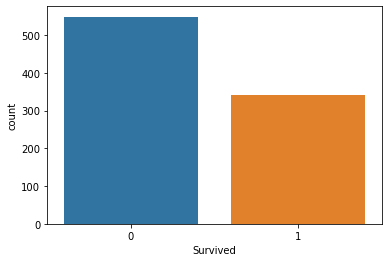

In [12]:
sns.countplot(x='Survived',data=titanic_data)

**Male vs Female Survival**

In [13]:
#Male vs Female Survived?

<AxesSubplot:xlabel='Survived', ylabel='count'>

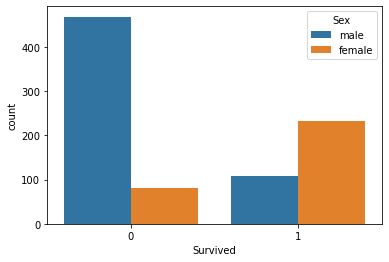

In [14]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

**See age group of passengeres travelled **<br>
Note: We will use displot method to see the histogram. However some records does not have age hence the method will throw an error. In order to avoid that we will use dropna method to eliminate null values from graph

In [15]:
#Checking for null

In [16]:
titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#Checking how many values are null

In [19]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#Visualizing null values

<AxesSubplot:>

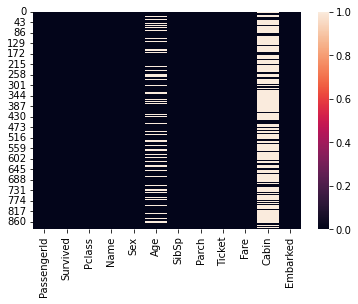

In [21]:
sns.heatmap(titanic_data.isna())

In [22]:
#finding the % of null values in age column

In [23]:
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.865319865319865

In [24]:
#finding the % of null values in cabin column

In [25]:
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

In [26]:
#finding the distribution for the age column

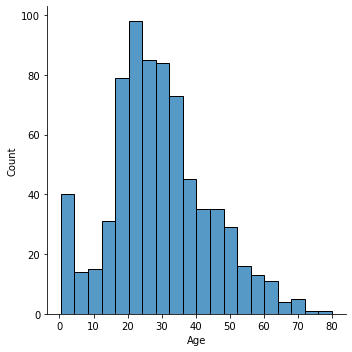

In [27]:
sns.displot(x='Age',data=titanic_data)

<h1>Data Cleaning

**Filling the missing values**<br> we will fill the missing values for age. In order to fill missing values we use fillna method.<br> For now we will filling the missing age by taking average of all age 

In [29]:
#filling age column

In [30]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

**We can verify that no more null data exist** <br> we will examine data by isnull mehtod which will return nothing

In [31]:
#verifying null value

In [32]:
titanic_data['Age'].isna().sum()

0

**Alternatively we will visualise the null value using heatmap**<br>
we will use heatmap method by passing only records which are null. 

In [33]:
#visualizing null values

<AxesSubplot:>

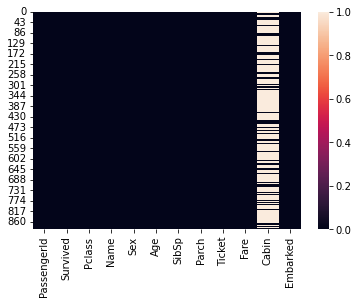

In [34]:
sns.heatmap(titanic_data.isna())

**We can see cabin column has a number of null values, as such we can not use it for prediction. Hence we will drop it**

In [35]:
#Droping cabin column

In [36]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [37]:
#seeing the contents of the data

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Preaparing Data for Model**<br>
No we will require to convert all non-numerical columns to numeric. Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method

In [39]:
#Checking for the non-numeric column

In [40]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [41]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

**We can see, Name, Sex, Ticket and Embarked are non-numerical.It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it. For Now we would convert Sex Column to dummies numerical values******

In [42]:
#converting sex column to numerical values

In [43]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [44]:
titanic_data['Gender']=gender

In [45]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [46]:
#droping the columns which are not required

In [47]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [48]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [49]:
#Seperating Dependent and Independent variables

In [50]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

In [51]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<h1>Data Modelling

**Building Model using Logestic Regression**

**Build the model**

In [54]:
#importing train test split method

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
#training test split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [58]:
#import Logistic  Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
#Fit  Logistic Regression 

In [61]:
lr=LogisticRegression()

In [62]:
lr.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
#predicting

In [64]:
predict=lr.predict(x_test)

<h1>Testing

**See how our model is performing**

In [66]:
#printing confusion matrix 

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,38,82


Type Markdown and LaTeX:  𝛼2

In [69]:
#import classification report

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295





Note: <br>
Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations <br>
Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class
F1 score - F1 Score is the weighted average of Precision and Recall.



<h1> ROC(Receiver Operating Characteristic) Curve

# AUC (Area Under the Curve) Score

In [73]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict))
pd.crosstab(y_test,predict)

0.7898305084745763


col_0,0,1
Survived,,
0,151,24
1,38,82


In [75]:
lr.predict_proba(x_test)[:, 1]

array([0.13587817, 0.17968641, 0.20181192, 0.76196978, 0.52500524,
       0.85296182, 0.61122635, 0.11214918, 0.59513479, 0.61658338,
       0.2236505 , 0.17556198, 0.52017895, 0.12273572, 0.16991054,
       0.82879019, 0.31065059, 0.68784002, 0.25808186, 0.24429268,
       0.12988274, 0.25035001, 0.54921289, 0.18094969, 0.16828134,
       0.10379284, 0.18404478, 0.22010465, 0.05377355, 0.63258652,
       0.20774306, 0.57746341, 0.32956321, 0.59581689, 0.12164174,
       0.1563763 , 0.2004186 , 0.58787937, 0.8453824 , 0.18449557,
       0.20050436, 0.1284731 , 0.19926993, 0.19165142, 0.57809901,
       0.06287292, 0.10834121, 0.13811916, 0.12000945, 0.40373898,
       0.54400738, 0.87844395, 0.05680301, 0.43265014, 0.12148488,
       0.82507523, 0.13332923, 0.97121725, 0.67794506, 0.55624225,
       0.14304034, 0.67441941, 0.70080522, 0.20360235, 0.11860186,
       0.75384194, 0.25154363, 0.14335862, 0.10940424, 0.86174142,
       0.62022122, 0.95947831, 0.34943751, 0.868329  , 0.19988

In [80]:
y_predict_th3 = np.where(lr.predict_proba(x_test)[:,1]>0.3,1,0) #Threshold is 0.3
y_predict_th4 = np.where(lr.predict_proba(x_test)[:,1]>0.4,1,0) #Threshold is 0.4


In [81]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
Survived,,
0,145,30
1,34,86


In [82]:
def predict_threshold (lr,x_test,thresholds):
    return np.where(lr.predict_proba(x_test)[:,1]>thresholds,1,0) #Threshold is 0.3

In [85]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(lr,x_test,thr)
    print("Threshold :", thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0 175]
 [  0 120]]
Threshold : 0.1
[[  7 168]
 [  2 118]]
Threshold : 0.2
[[114  61]
 [ 13 107]]
Threshold : 0.30000000000000004
[[142  33]
 [ 29  91]]
Threshold : 0.4
[[145  30]
 [ 34  86]]
Threshold : 0.5
[[151  24]
 [ 38  82]]
Threshold : 0.6000000000000001
[[160  15]
 [ 55  65]]
Threshold : 0.7000000000000001
[[170   5]
 [ 76  44]]
Threshold : 0.8
[[175   0]
 [ 87  33]]
Threshold : 0.9
[[175   0]
 [111   9]]


In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

In [87]:
tpr,fpr,thresholds = roc_curve(y_test,lr.predict_proba(x_test)[:,1],drop_intermediate=False)

In [88]:
thresholds

array([1.98105522, 0.98105522, 0.97393412, 0.97264326, 0.97121725,
       0.95947831, 0.95448668, 0.90795724, 0.90382608, 0.90309314,
       0.89621951, 0.89620444, 0.88232092, 0.88011415, 0.87866755,
       0.87844395, 0.87288741, 0.86958026, 0.868329  , 0.86174142,
       0.8617236 , 0.85885038, 0.85296182, 0.85173975, 0.84612225,
       0.8453824 , 0.83881033, 0.83471455, 0.82879019, 0.82708803,
       0.82507523, 0.81881068, 0.81826609, 0.80464661, 0.7942377 ,
       0.77913116, 0.7747501 , 0.76903538, 0.76196978, 0.7569597 ,
       0.75384194, 0.7361464 , 0.73135383, 0.72479741, 0.7215841 ,
       0.71644528, 0.71024833, 0.70926055, 0.70157369, 0.70080522,
       0.697604  , 0.68911607, 0.68784002, 0.68614956, 0.68323917,
       0.6806072 , 0.67966349, 0.67794506, 0.67441941, 0.66962673,
       0.66512295, 0.66293588, 0.65845621, 0.65756393, 0.65676514,
       0.65238891, 0.64552267, 0.64044419, 0.64042355, 0.63952582,
       0.63881914, 0.63258652, 0.63257911, 0.62784584, 0.62487

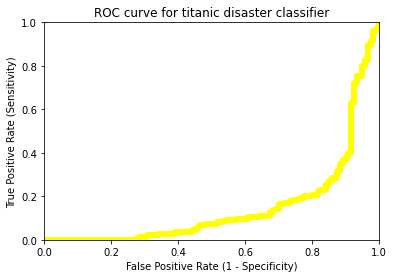

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
tpr,fpr,thresholds = roc_curve(y_test,lr.predict_proba(x_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for titanic disaster classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color='yellow', lw=6)
plt.show()

In [90]:
roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])

0.8518571428571428

**From the above roc_curve, we have seen that there is less accuary of data**